# Car Price Prediction with Machine Learning - Regression
Car prices are influenced by numerous factors, including brand reputation, vehicle features, horsepower, mileage, and more. Estimating car prices is a significant topic in machine learning research. If you’re interested in building a car price prediction model, this guide will walk you through the process using Python and machine learning techniques.

<div align="center">
<img src="https://media.istockphoto.com/id/867003336/photo/rising-car-costs.jpg?s=612x612&w=0&k=20&c=1hyDp76LXFrysMjEXsSUlgr3629rDKCSFW1rXA-eveI=">
</div>

## Car Price Prediction

Estimating the value of cars is a prominent topic in machine learning, especially within finance and marketing. Car prices are determined by a variety of factors, making this a complex and interesting area for research. Key elements that significantly impact a car’s price include:

1. Brand
2. Model
3. Horsepower
4. Mileage
5. Safety Technologies
6. Navigation Systems, among others.

While the manufacturer’s reputation can influence the final price, the core features and specifications of the vehicle play the most crucial role in setting its value. In the following sections, you’ll learn how to build a car price prediction model using Python and machine learning techniques.

In this car price prediction project, I use a dataset available [here](https://raw.githubusercontent.com/amankharwal/Website-data/master/CarPrice.csv). This dataset provides detailed information on important features that affect the price of a vehicle.

## Notebook Overview

This notebook presents a complete workflow for car price prediction using supervised regression:

1. Problem framing and data source
   - Define the prediction goal and load the public dataset of car specifications and prices.
2. Data loading and initial checks
   - Inspect schema, check missing values, and review dtypes to understand data readiness.
3. Exploratory Data Analysis (EDA)
   - Summaries and visualizations for target distribution, key numerical features (e.g., horsepower), and categorical profiles (e.g., fuel type, body style).
   - Relationship plots (e.g., horsepower vs. price) to surface nonlinearity and interactions.
4. Feature engineering
   - Extract `brand` from `CarName` and correct common typos.
   - Convert string numerics (e.g., `doornumber`, `cylindernumber`) to numeric.
   - Cast categorical variables to `category` dtype for efficient processing.
5. Data preprocessing
   - Select predictive features, drop low-signal/redundant identifiers, one‑hot encode categoricals, and scale numerics.
   - Split data into training and test sets for honest evaluation.
6. Modeling and evaluation
   - Benchmark multiple algorithms (Linear/Ridge/Lasso, Tree‑based, KNN, SVR, Gradient Boosting, Random Forest).
   - Compare models with R², MSE, and RMSE; identify the best performer.
7. Pipeline and serialization
   - Build a unified preprocessing + model `Pipeline` with a `RandomForestRegressor`.
   - Evaluate, then persist the pipeline to `car_price_prediction_pipeline.pkl` for reuse.
8. Conclusion
   - Summarize findings, key signals, limitations, and recommended next steps.

Deliverables:
- Trained and serialized pipeline: `car_price_prediction_pipeline.pkl`
- Reproducible notebook with EDA, modeling, and evaluation results.

## 1. Importing Libraries
First, let’s import the necessary libraries for data manipulation, visualization, and machine learning.

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import joblib
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import ExtraTreeRegressor, DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from tqdm.notebook import tqdm
from sklearn.metrics import r2_score, mean_squared_error

import warnings

### Configurations
- Ignore warnings for cleaner output.
- Display up to 100 columns and 100 rows for better visibility.
- Set default figure size to 12x8 inches for plots.
- Use seaborn's 'whitegrid' style for improved plot aesthetics.

In [31]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_style('whitegrid')

## 2. Data Loading
We will load the car price dataset using pandas and take a quick look at its structure.

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/CarPrice.csv', index_col=0)

In [4]:
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


This dataset contains 26 columns, so it’s essential to verify if there are any missing values before proceeding further.

In [5]:
df.isnull().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

Since there are no missing values in this dataset, we can move on to exploring some key insights. This will help us better understand the characteristics and structure of the data we’re working with.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205 entries, 1 to 205
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 17  bo

## 3. Exploratory Data Analysis (EDA)
To gain insights into the dataset, we will perform some exploratory data analysis (EDA). This includes checking the data types, summary statistics, and unique values in categorical columns.

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17
compressionratio,205.0,10.142537,3.972040,7.00,8.60,9.00,9.40,23.00


In [8]:
df.CarName.nunique()

147

In [9]:
df.CarName.unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

We can see the main car brand with splitting first word of `CarName` column.

In [10]:
df.CarName.apply(lambda x: x.split(' ')[0]).unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

The `price` column in our dataset represents the target variable we aim to predict. Let's visualize how car prices are distributed to better understand the range and frequency of values in this column.

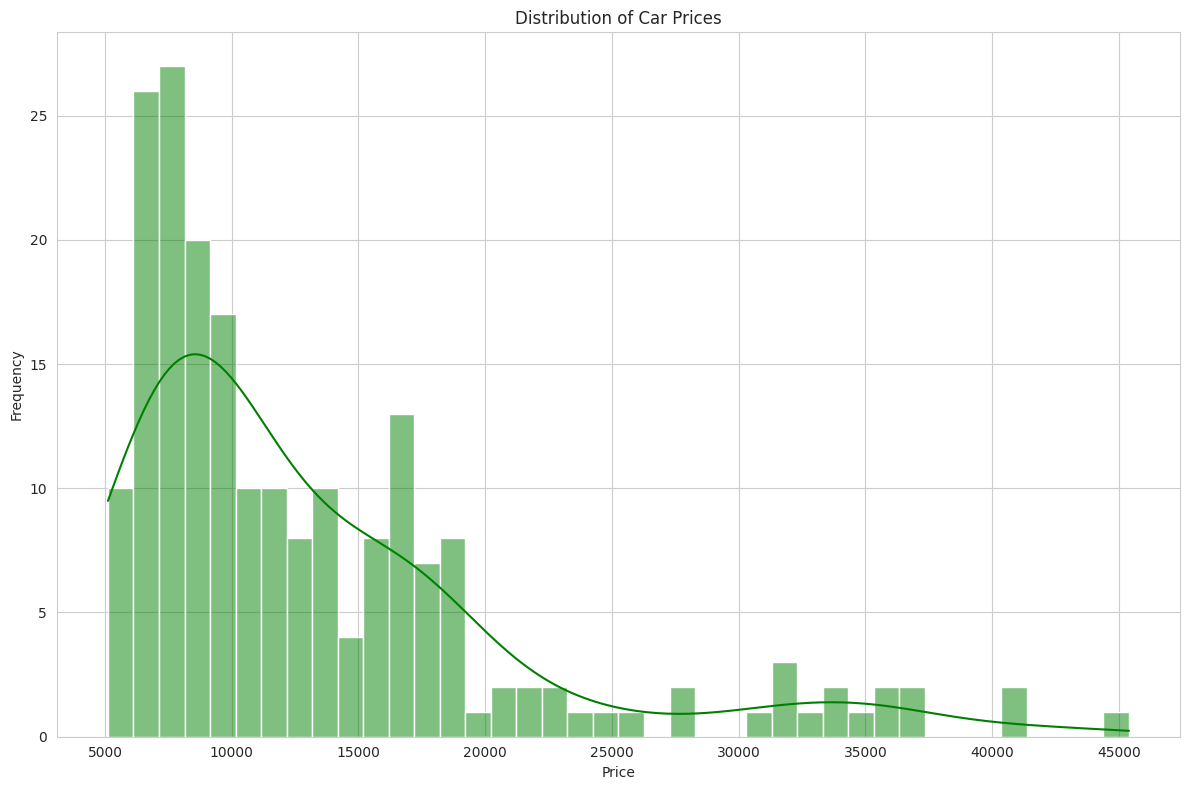

In [11]:
sns.histplot(df.price, bins=40, kde=True, color='g')
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.tight_layout()

Let's also visualize the boxplot to see the spread and potential outliers in car prices.

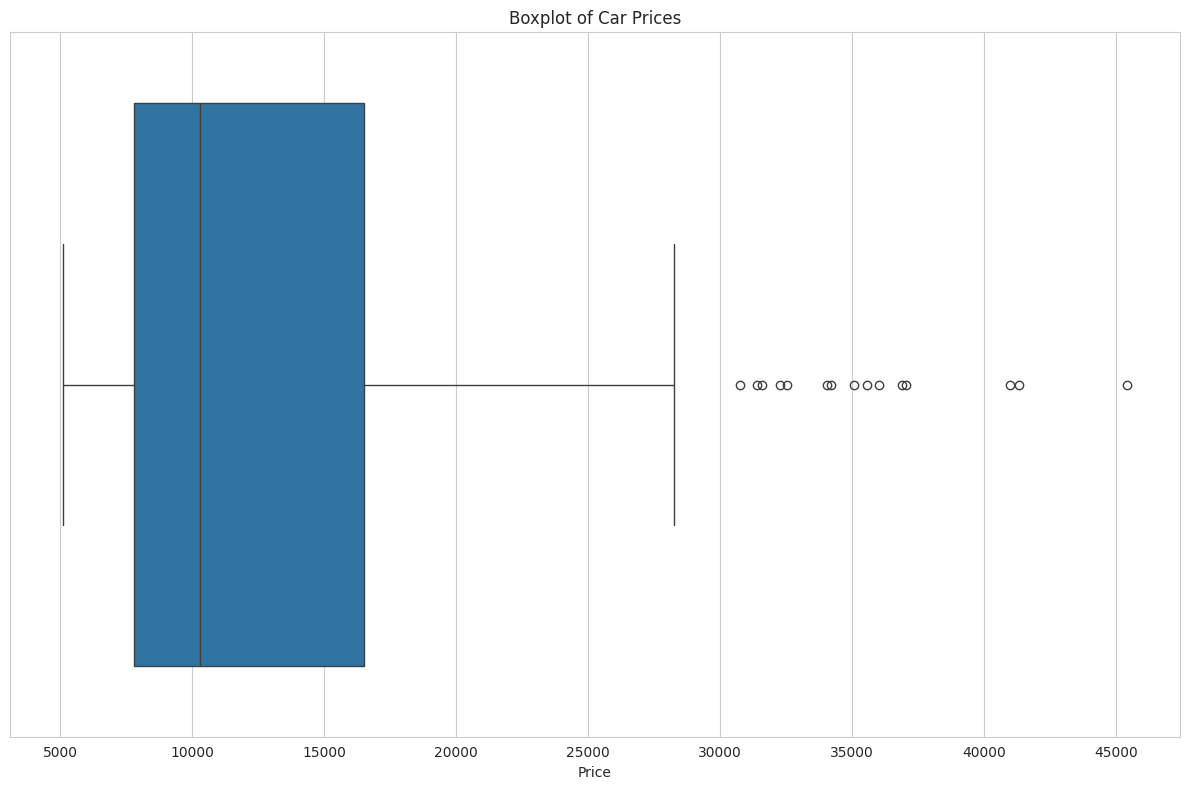

In [12]:
sns.boxplot(x=df.price)
plt.title('Boxplot of Car Prices')
plt.xlabel('Price')
plt.tight_layout()

Let's visualize the distribution of the `fueltype` column to understand the types of fuel used in the cars.

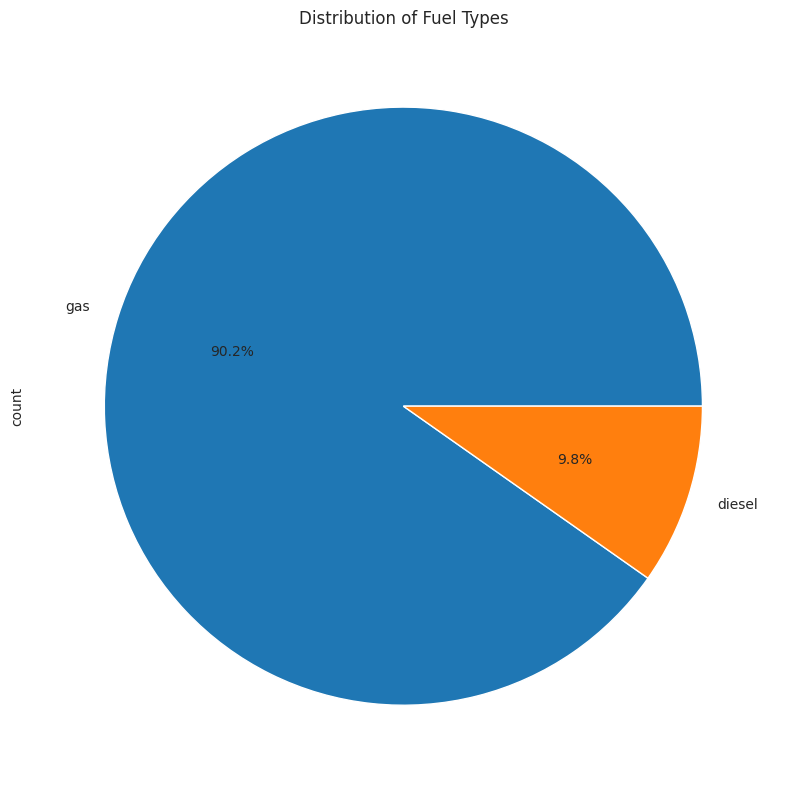

In [13]:
df.fueltype.value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribution of Fuel Types')
plt.tight_layout()

Let's visualize the distribution of the `doornumber` column to understand how many cars have two doors versus four doors.


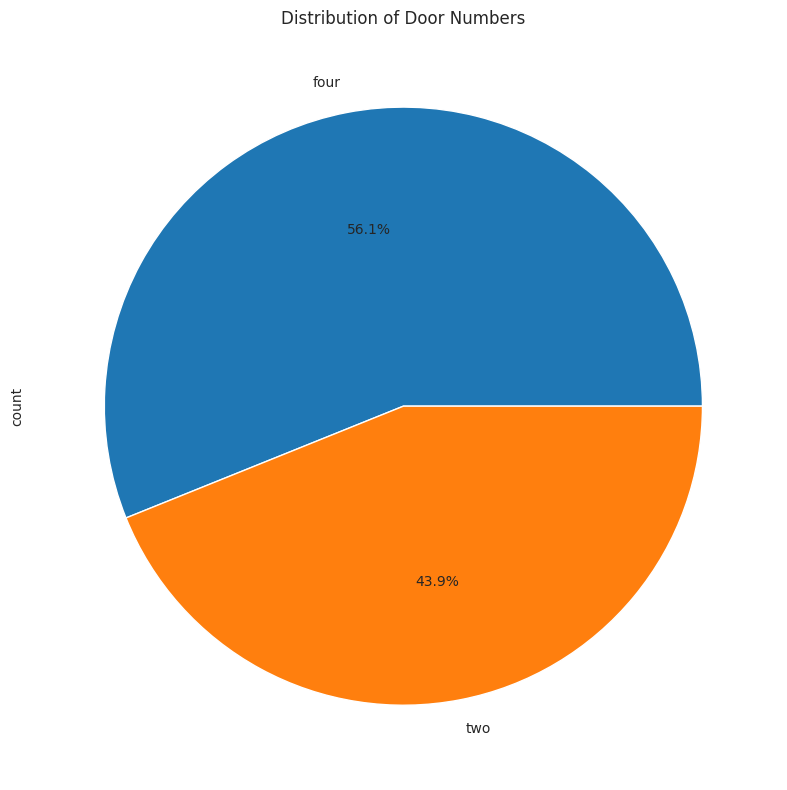

In [14]:
df.doornumber.value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribution of Door Numbers')
plt.tight_layout()

Now let's visualize the distribution of the `horsepower` column to understand the power of the cars in the dataset.

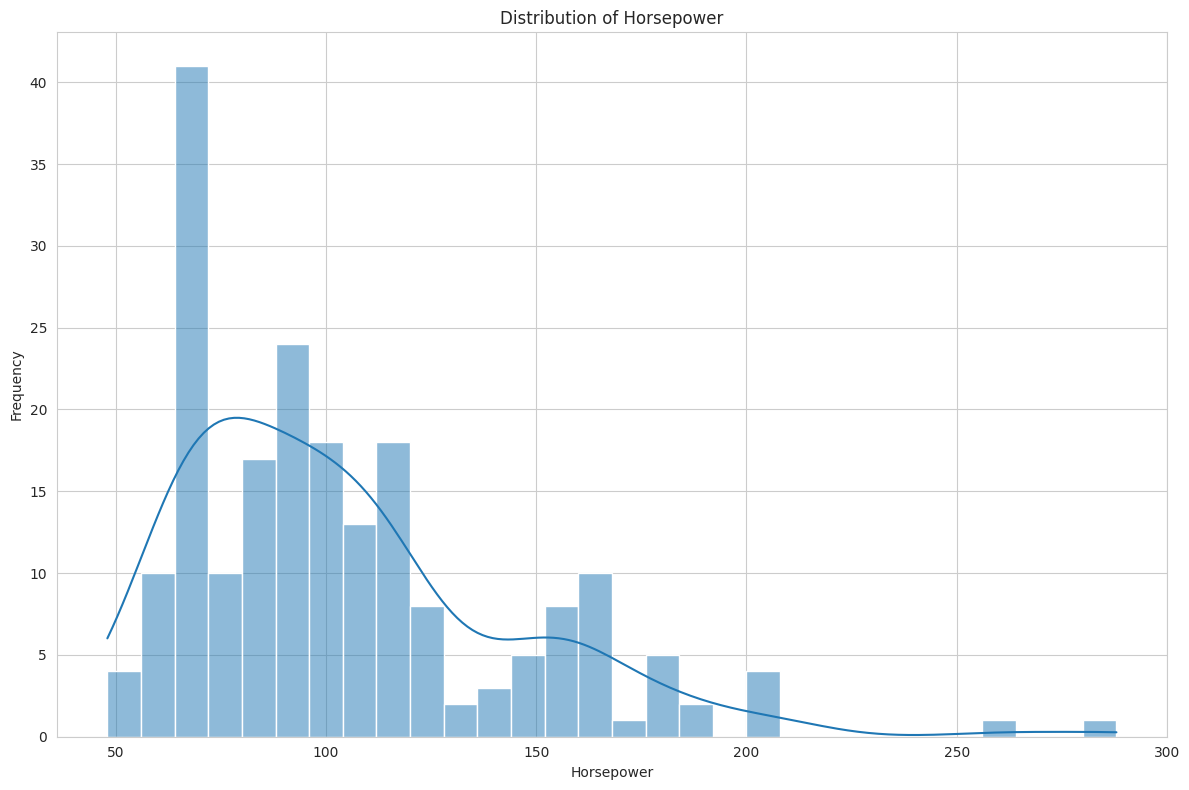

In [15]:
sns.histplot(df.horsepower, bins=30, kde=True)
plt.title('Distribution of Horsepower')
plt.xlabel('Horsepower')
plt.ylabel('Frequency')
plt.tight_layout()

Now let's visualize the relationship between `horsepower` and `price`, colored by `fueltype` and sized by `enginesize`.

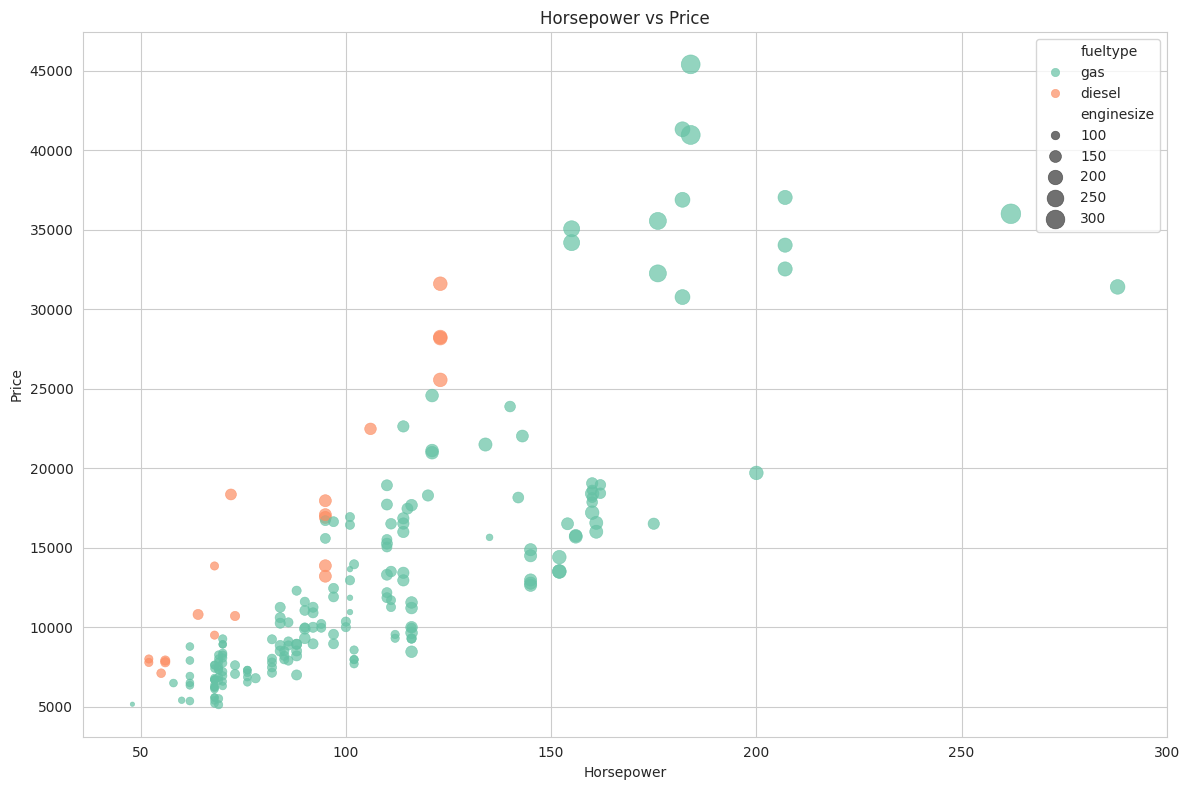

In [16]:
sns.scatterplot(
    df,
    x='horsepower',
    y='price',
    hue='fueltype',
    palette='Set2',
    alpha=0.7,
    edgecolor=None,
    size='enginesize',
    sizes=(10, 200)
)
plt.title('Horsepower vs Price')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.tight_layout()

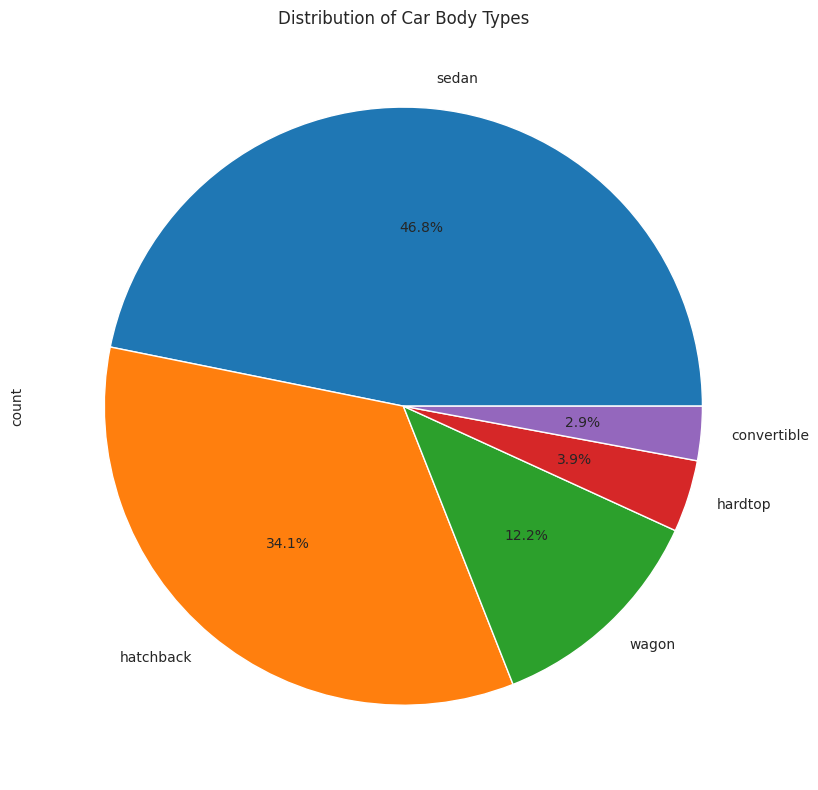

In [17]:
df.carbody.value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribution of Car Body Types')
plt.tight_layout()

Let's see the relationship between `carwidth` and `carheight` with respect to `carbody` type and `price`.

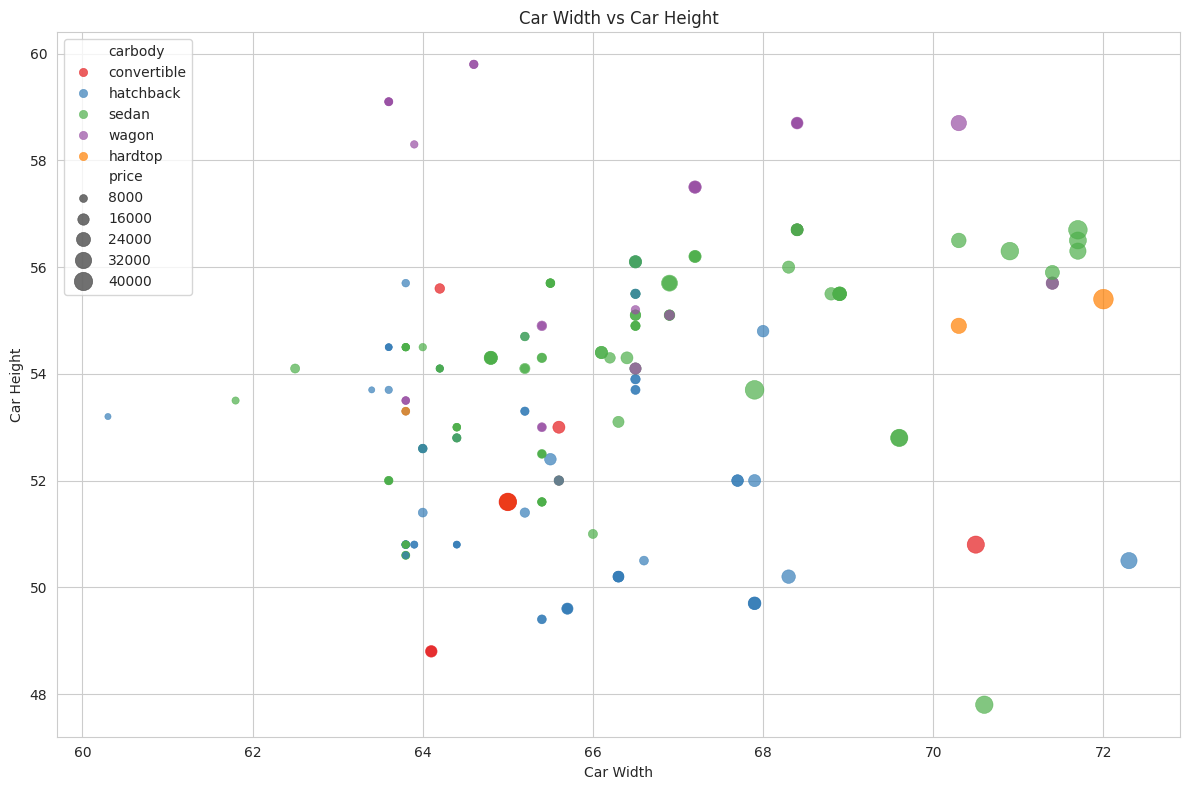

In [18]:
sns.scatterplot(
    df,
    x='carwidth',
    y='carheight',
    hue='carbody',
    palette='Set1',
    alpha=0.7,
    edgecolor=None,
    size='price',
    sizes=(20, 200)
)
plt.title('Car Width vs Car Height')
plt.xlabel('Car Width')
plt.ylabel('Car Height')
plt.tight_layout()

## 4. Feature Engineering
To prepare the data for modeling, we need to do some feature engineering. This includes encoding categorical variables and converting string numbers to integers.

Let's check the data types of all columns to identify which ones need to be converted or encoded.

In [20]:
df.dtypes

symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

Convert the `doornumber` column from string values ('two', 'four') to numeric values (2, 4).

In [21]:
df['doornumber'] = df.doornumber.map({'two': 2, 'four': 4})

Convert `cylindernumber` from words to integers

In [22]:
df['cylindernumber'] = df.cylindernumber.map({
    'two': 2,
    'three': 3,
    'four': 4,
    'five': 5,
    'six': 6,
    'eight': 8,
    'twelve': 12
})

Let's create a new feature `brand` by extracting the brand name from the 'CarName' column.

In [23]:
df['brand'] = df.CarName.apply(lambda x: x.split()[0])

In [24]:
df.brand.value_counts()

brand
toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
volvo          11
peugeot        11
dodge           9
volkswagen      9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         4
isuzu           4
alfa-romero     3
jaguar          3
chevrolet       3
renault         2
maxda           2
vw              2
mercury         1
porcshce        1
Nissan          1
toyouta         1
vokswagen       1
Name: count, dtype: int64

Some brands are misspelled. Let's correct them.

In [25]:
df['brand'] = df.brand.replace({
    'maxda': 'mazda',
    'vw': 'volkswagen',
    'vokswagen': 'volkswagen',
    'porcshce': 'porsche',
    'alfa-romero': 'alfa-romeo',
    'toyouta': 'toyota',
    'Nissan': 'nissan',
})

Now let's convert categorical columns to 'category' dtype

In [26]:
df = df.astype({
    'fueltype': 'category',
    'aspiration': 'category',
    'carbody': 'category',
    'drivewheel': 'category',
    'enginelocation': 'category',
    'enginetype': 'category',
    'fuelsystem': 'category',
    'brand': 'category'
})

## 5. Data Preprocessing
Before training our machine learning model, we need to preprocess the data and seperate features and target variable.

Here we define the feature matrix (X) and the target vector (y). We also drop low-correlation, redundant, or identifier-like columns to reduce noise and multicollinearity, keeping variables most relevant to predicting price.

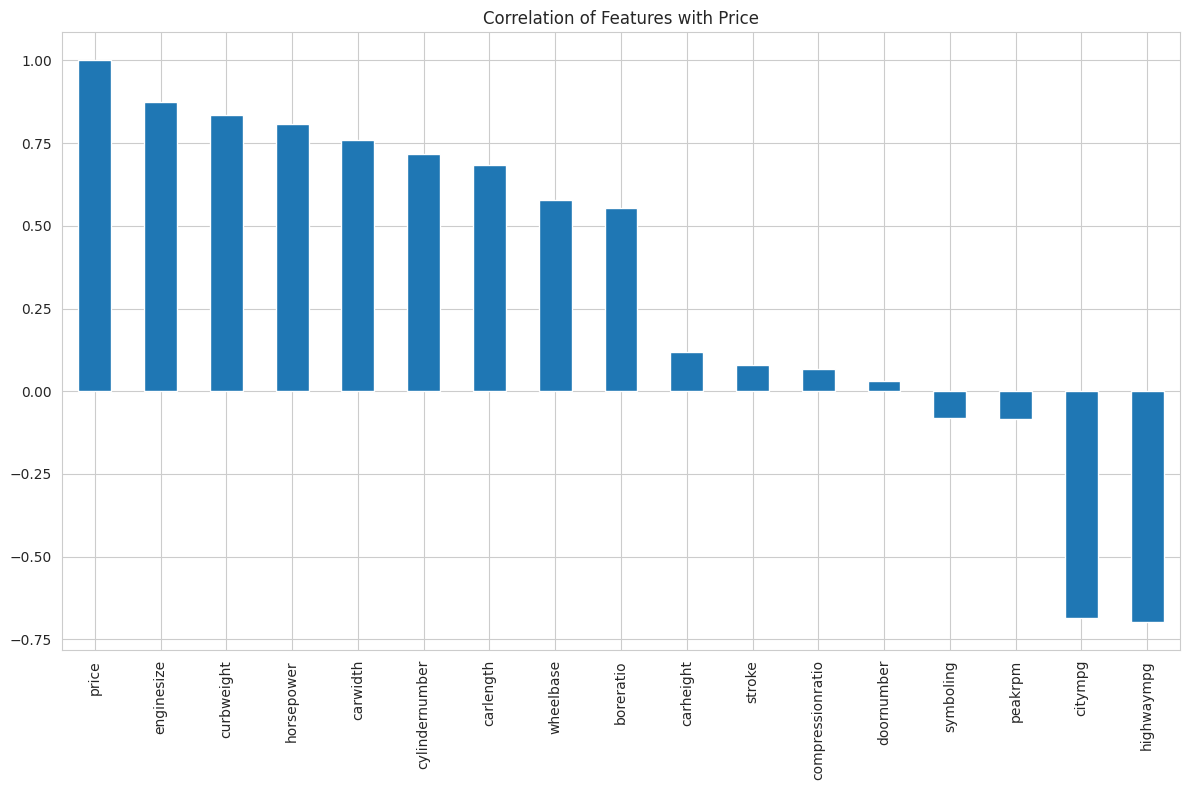

In [70]:
df.corr(numeric_only=True)['price'].sort_values(ascending=False).plot.bar()
plt.title('Correlation of Features with Price')
plt.tight_layout()

In [42]:
x = df.drop(columns=['price', 'CarName', 'carheight', 'stroke', 'compressionratio', 'doornumber', 'symboling', 'peakrpm'])
y = df['price']

One-hot encode categorical features into a numeric matrix.

In [72]:
x_dummies = pd.get_dummies(x)

Scale the features with using `MinMaxScaler`.

In [74]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_dummies)

Split the data into training and testing sets.

In [76]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

# 6. Model Building & Evaluation
Train and evaluate multiple regression models for car price prediction.

Define a reusable helper function that fits various regression models on the training data, predicts on train/test, computes MSE, RMSE, and R².

In [81]:
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "ExtraTreeRegressor": ExtraTreeRegressor(),
    "KNeighborsRegressor": KNeighborsRegressor(n_neighbors=5),
    "SVR": SVR(),
    "GradientBoostingRegressor": GradientBoostingRegressor(),
    "RandomForestRegressor": RandomForestRegressor()
}


def evaluate(x_train, y_train, x_test, y_test):
    results = []
    for name, model in tqdm(models.items()):
        y_pred = model.fit(x_train, y_train).predict(x_test)
        
        results.append({
            "Model": name,
            "R2_Score": r2_score(y_test, y_pred),
            "MSE": mean_squared_error(y_test, y_pred),
            "RMSE": mean_squared_error(y_test, y_pred)**0.5
        })
    report = pd.DataFrame(results).sort_values('R2_Score', ascending=False)
    report.reset_index(drop=True, inplace=True)
    return report

Evaluate the performance of each model on the test set.

In [82]:
result_df = evaluate(x_train, y_train, x_test, y_test)
result_df

  0%|          | 0/9 [00:00<?, ?it/s]

,Model,R2_Score,MSE,RMSE
0,RandomForestRegressor,0.954806,3.567831e+06,1888.870313
1,GradientBoostingRegressor,0.928116,5.674844e+06,2382.193005
2,ExtraTreeRegressor,0.922541,6.114943e+06,2472.841126
3,DecisionTreeRegressor,0.891563,8.560485e+06,2925.830571
4,LinearRegression,0.887625,8.871364e+06,2978.483465
5,Lasso,0.883871,9.167699e+06,3027.820908
6,Ridge,0.869086,1.033487e+07,3214.788615
7,KNeighborsRegressor,0.801692,1.565521e+07,3956.666916
8,SVR,-0.100102,8.684646e+07,9319.144682


From the results above, the top performer is the **RandomForestRegressor**, achieving the highest R² and one of the lowest RMSE values on the test set. This indicates strong generalization for car price prediction. Exact scores may vary with the train/test split and hyperparameters.

# 7. Model Saving
Build a preprocessing + model pipeline (encoding, scaling, estimator) and save it for inference.

In [98]:
preprocessor = ColumnTransformer([
    ('encoder', OneHotEncoder(), x.select_dtypes(include='category').columns.tolist()),
    ('scaler', MinMaxScaler(), x.select_dtypes(include='number').columns.tolist())
])

In [105]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor())
])
pipeline.fit(x, y)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('encoder', ...), ('scaler', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


Evaluate pipeline on trained data.

In [125]:
pr2 = r2_score(y, pipeline.predict(x))
pmse = mean_squared_error(y, pipeline.predict(x))
prmse = pmse**0.5

print(f"R2 Score : {pr2:.4f}")
print(f"MSE      : {pmse:.4f}")
print(f"RMSE     : {prmse:.4f}")

R2 Score : 0.9895
MSE      : 664228.3126
RMSE     : 815.0020


Saving the pipeline

In [126]:
joblib.dump(pipeline, 'car_price_prediction_pipeline.pkl')

['car_price_prediction_pipeline.pkl']

## 8. Conclusion

This project built an end‑to‑end regression pipeline to predict car prices from technical specifications and categorical attributes. After exploratory data analysis to understand distributions and relationships (e.g., horsepower vs. price) and light feature engineering (brand extraction and typo fixes), we encoded categorical variables and scaled numeric features to prepare the data for modeling.

We benchmarked multiple algorithms and found that a RandomForestRegressor performed best on the hold‑out set, delivering the strongest R² and competitive RMSE among tested models. We then packaged preprocessing and modeling into a single `Pipeline` and saved it as `car_price_prediction_pipeline.pkl` for reproducible inference and deployment.

Key takeaways:
- Model performance is driven by engine and dimensional features; categorical brand information also adds signal.
- Tree‑based methods (Random Forest, Gradient Boosting) handled mixed feature types and nonlinearities well with minimal tuning.

Limitations and next steps:
- The dataset is relatively small (n=205); cross‑validation and hyperparameter optimization (e.g., randomized/grid search) could further stabilize results.
- Additional features (age, condition, region, options) and domain‑aware feature engineering may boost accuracy.
- Calibrate and monitor the model in production; add explainability (feature importance/SHAP) for transparency.

Overall, the notebook demonstrates a clear, reproducible workflow—from EDA to model selection and serialization—that can be readily extended into an API or app for practical car price estimation.
